<a href="https://colab.research.google.com/github/hemanththalluri/pandu12/blob/main/Clustering_with_K_Mean_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/income.csv"

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
file_path = "/content/drive/MyDrive/income.csv"
df = pd.read_csv(file_path)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


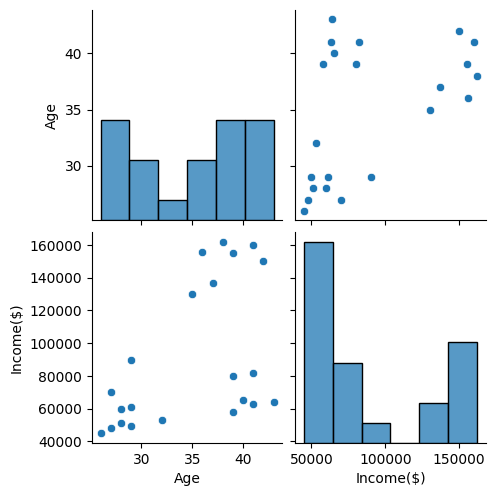

In [ ]:
sns.pairplot(df)

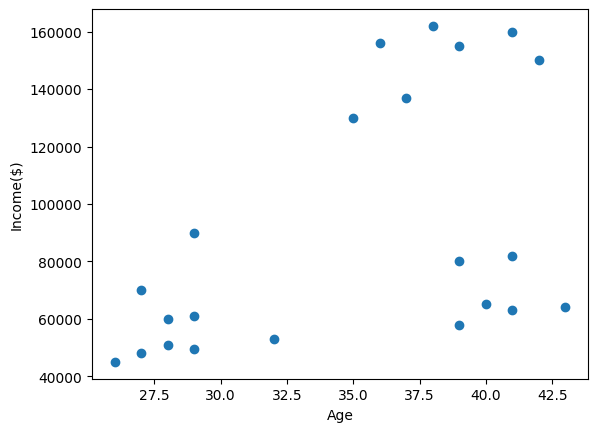

In [ ]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 4, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


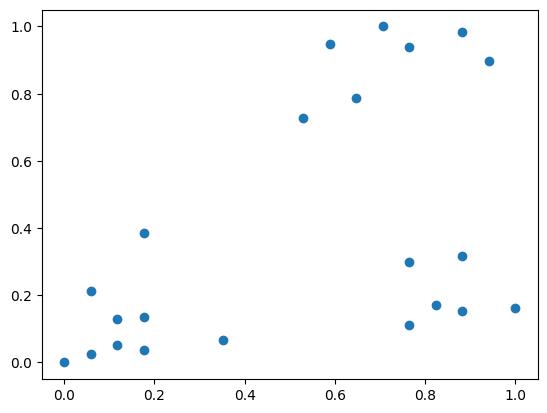

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [ ]:
km.cluster_centers_

array([[3.63333333e+01, 8.40000000e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.52857143e+01, 6.30000000e+04],
       [3.60000000e+01, 1.33500000e+05],
       [2.84000000e+01, 4.93000000e+04]])

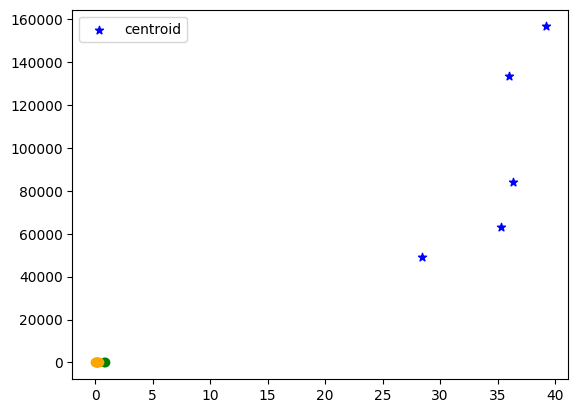

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==4]
df3 = df[df.cluster==8]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='orange')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.legend()